[Table of Contents](table_of_contents.ipynb)

In [1]:
import numpy as np
import csv
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Anwendung der Hauptkomponentenanalyse auf Bilder

Einlesen der Bilder als csv-Files. Die Dimension der Bilder muss bekannt sein.
- `soccerBall.csv`:
    64 Bilder von Fußbällen, Bildgröße(32x32 Pixel), eine Zeile in dem Eingabefile

In [2]:
with open('data/soccerBall.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        row = [int(i) for i in row]
        row = np.array(row)
        bilder = row.reshape((64,1024))

Darstellung der Originalbilder:
- `zeilen`: Zeilen der Ausgabe
- `spalten`: Spalten der Ausgabe

In [3]:
zeilen = 8
spalten = 8
bildzeilen = 32
bildspalten = 32

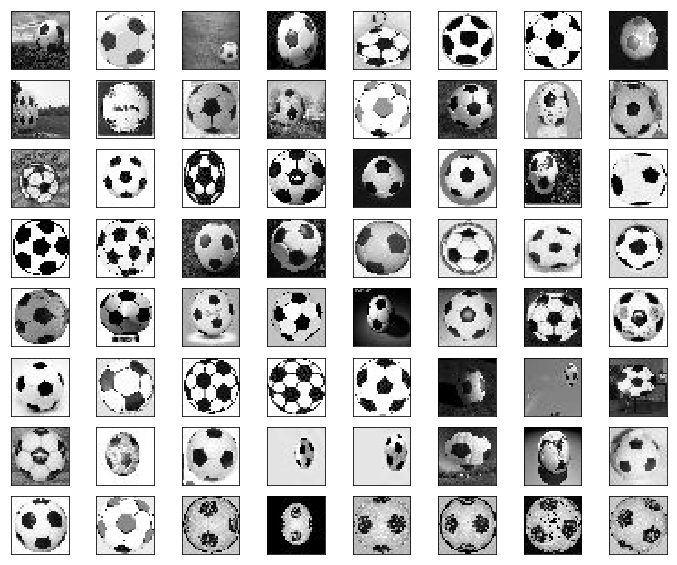

In [4]:
plt.figure(figsize=(12,10))
for i in range(bilder.shape[0]):
    plt.subplot(zeilen,spalten,i+1)
    #b1 = np.flipud(np.transpose(num[i,:].reshape((5,3))))
    b1 = np.flipud(np.transpose(bilder[i].reshape((bildzeilen,bildspalten))))
    plt.imshow(b1, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

In [5]:
mean_vector = np.mean(bilder,axis=0)
#print('Mean Vector:\n', mean_vector)

In [6]:
bilder_mf = bilder - np.hstack(mean_vector)
#print('Mittelwertfreie Daten:\n', bilder_mf)

In [7]:
bilder_cov = 1/(bilder.shape[0])*np.dot(np.transpose(bilder_mf), bilder_mf)
#print('Kovarianzmatrix:\n', bilder_cov)

In [8]:
eig_val_cov, eig_vec_cov = np.linalg.eigh(bilder_cov)
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i].reshape(1,bilder.shape[1]).T

    #print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    #print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    #print(40 * '-')

In [9]:
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

eig_pairs.sort()
eig_pairs.reverse()

#for i in eig_pairs:
    #print(i[0])

Text(0.5,1,'Mittelwertbild')

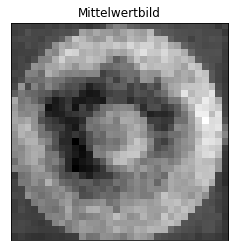

In [10]:
plt.imshow(np.flipud(np.transpose(mean_vector[::-1].reshape((bildzeilen, bildspalten)))).T, origin='lower',
                                  cmap=plt.cm.gray_r, interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('Mittelwertbild')

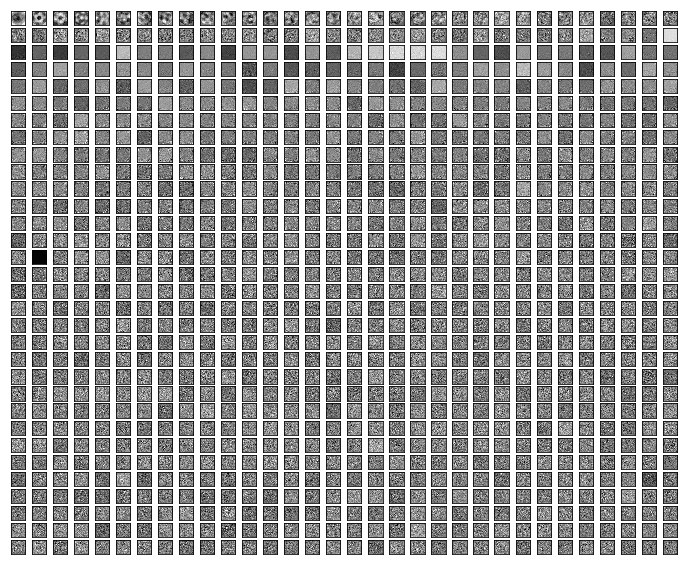

In [11]:
plt.figure(figsize=(12,10))
for i in range(len(eig_val_cov)):
    eig_vec = eig_pairs[i][1]
    plt.subplot(32,32,i+1)
    b1 = np.flipud(np.transpose(eig_vec[::-1].reshape((bildzeilen,bildspalten))))
    plt.imshow(b1.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

Sortierte Eigenvektoren werden in Eigenvektormatrix zusammengefasst.

In [12]:
eig_vec_mat = []
for i in range(len(eig_val_cov)):
    eig_vec_mat.append(eig_pairs[i][1])

Erste n Eigenvektoren werden ausgewählt.

In [21]:
n = 150
eig_vec_mat_red = np.array(eig_vec_mat[0:n+1])

In [22]:
x = np.dot(np.dot(bilder_mf,np.transpose(eig_vec_mat_red)),eig_vec_mat_red)

In [23]:
res = x + np.hstack(mean_vector)

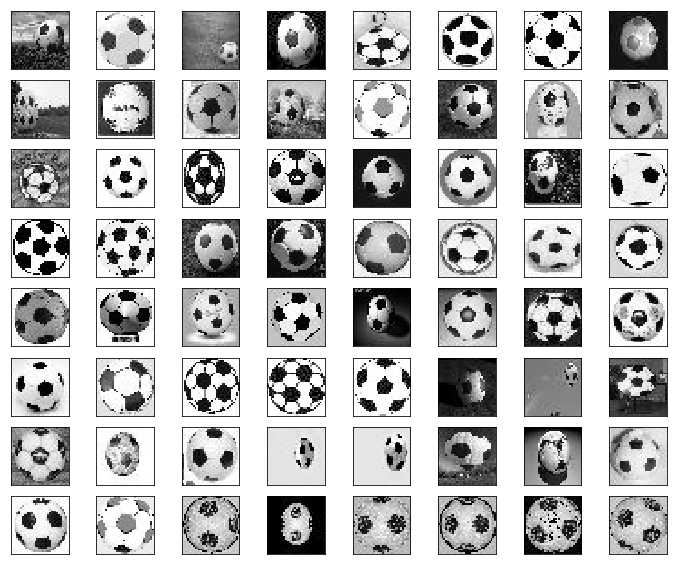

In [24]:
plt.figure(figsize=(12,10))
for i in range(res.shape[0]):
    plt.subplot(zeilen,spalten,i+1)
    #b1 = np.flipud(np.transpose(num[i,:].reshape((5,3))))
    b1 = np.flipud(np.transpose(res[i].reshape((bildzeilen,bildspalten))))
    plt.imshow(b1, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])